In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rubin_sim.data import get_baseline
import sqlite3

In [3]:
baseline = get_baseline()

In [4]:
baseline

'/Users/yoachim/rubin_sim_data/sim_baseline/baseline_v2.1_10yrs.db'

In [5]:
con = sqlite3.connect(baseline)
df = pd.read_sql('select * from observations', con)
con.close()

In [9]:
same_filt = df['filter'].values[1:] == df['filter'].values[:-1]

In [12]:
close = df['observationStartMJD'].values[1:]-df['observationStartMJD'].values[:-1] < 2./60./24

In [24]:
d_rot = df['rotTelPos'].values[1:][(same_filt & close)] - df['rotTelPos'].values[:-1][(same_filt & close)]

d_rot[np.where(d_rot > 180)] -=360
d_rot[np.where(d_rot < -180)] +=360


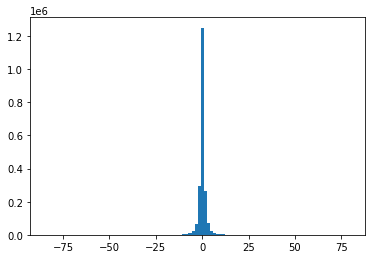

In [25]:
ack = plt.hist(d_rot, bins=100)

In [26]:
d_rot.max()

79.61750449637162

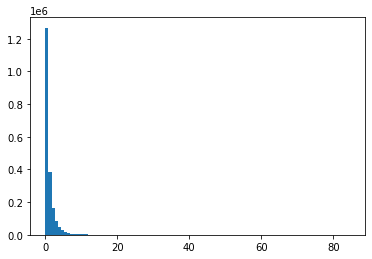

In [27]:
ack = plt.hist(np.abs(d_rot), bins=100)

In [29]:
np.median(np.abs(d_rot)), np.mean(np.abs(d_rot))

(0.5605779833228723, 1.2104034398760808)